# **Data Collection**

We are gathering two files.


1.   Chemicals_in_Cosmetics.csv file - This file has details of cosmetic products, manufacturer details and chemicals used in its manufacturing.
2.   Chemlist.pdf file - This file contains details of chemicals and the disorders that these chemicals can cause.

Both these files has CAS Number field, which is an unique identifier for each chemical.



In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import math

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Read chemicals_in_cosmetics file
cic=pd.read_csv('chemicals_in_cosmetics.csv')
pd.set_option('display.max_columns', None)
cic.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [ ]:
cic.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

In [ ]:
#Checking shape of cic dataframe
cic.shape

(114298, 22)

In [ ]:
#Displaying columns of cic dataframe
cic.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

In [ ]:
#Reading chemlist.pdf file

Chemlist.pdf file is pdf file, which has data in tabular format. We need to read the tabular data from chemlist.pdf file and convert it into dataframe for further analysis.

For this purpose, I'm making use of '**tabula**' package, which helps to read tabular data from pdf file

In [ ]:
#Installing tabula-py using pip
!pip3 install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 87.9 MB/s eta 0:00:00


In [ ]:
#Importing tabula package
import tabula

Reading tabular data of each page using tabula package and converting it into dataframe. Finally merging them to get the final dataframe which has details of all the chemicals and toxicity details.

In [ ]:
# Specify the path to your PDF file
pdf_file = "chemlist.pdf"
numb_of_pages=35
cheml=pd.DataFrame()

for i in range(numb_of_pages-2):
  # Extract tabular data from the each page
  df_list = tabula.read_pdf(pdf_file, pages=i+2)

  #Formatting the tabular details properly into a dataframe

  result_df = pd.concat(df_list, ignore_index=True)
  result_df=result_df.tail(len(result_df)-1)

  pdf=pd.DataFrame()
  pdf['Chemical']=result_df['Unnamed: 1']
  pdf['Synonyms']=result_df['Unnamed: 2']
  pdf['CAS Number']=result_df['Unnamed: 3']
  pdf['Cancer']=result_df['Type of Toxicity']
  pdf['Developmental']=result_df['Authoritative Body Listing']
  pdf['Female Reproductive']=result_df['Unnamed: 4']
  pdf['Males Reproductive']=result_df['Unnamed: 5']
  pdf['AuthBody_CalEPA-Prop 65']=result_df['Unnamed: 6']
  pdf['AuthBody_IARC']=result_df['Unnamed: 7']
  pdf['AuthBody_EPA-IRIS']=result_df['Unnamed: 8']
  pdf['AuthBody_NTP-RoC']=result_df['Unnamed: 9']
  pdf['AuthBody_NTP-OHAT']=result_df['Unnamed: 10']

  # Combine the extracted DataFrames into one along rows
  cheml = pd.concat([cheml, pdf], axis=0)
cheml.reset_index(inplace=True, drop=True )

Nov 24, 2023 6:01:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Nov 24, 2023 6:01:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Nov 24, 2023 6:01:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 24, 2023 6:01:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



In [ ]:
#length of cheml dataframe
len(cheml)

1037

In [ ]:
#Presenting top 5 rows
cheml.head(5)

,Chemical,Synonyms,CAS Number,Cancer,Developmental,Female Reproductive,Males Reproductive,AuthBody_CalEPA-Prop 65,AuthBody_IARC,AuthBody_EPA-IRIS,AuthBody_NTP-RoC,AuthBody_NTP-OHAT
0,1-(2-Chloroethyl)-3-(4-methylcyclohexyl)-1-\rn...,Semustine,13909-09-6,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN
1,1-(2-Chloroethyl)-3-cyclohexyl-1-nitrosourea\r...,NaN,13010-47-4,x,NaN,NaN,NaN,x,x,NaN,NaN,NaN
2,1-(2-Chloroethyl)-3-cyclohexyl-1-nitrosourea\r...,NaN,13010-47-4,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN
3,"1,1,1,2-Tetrachloroethane",NaN,630-20-6,x,NaN,NaN,NaN,x,x,x,NaN,NaN
4,"1,1,2,2-Tetrachloroethane",NaN,79-34-5,x,NaN,NaN,NaN,x,x,x,NaN,NaN


In [ ]:
cheml.dtypes

Chemical                   object
Synonyms                   object
CAS Number                 object
Cancer                     object
Developmental              object
Female Reproductive        object
Males Reproductive         object
AuthBody_CalEPA-Prop 65    object
AuthBody_IARC              object
AuthBody_EPA-IRIS          object
AuthBody_NTP-RoC           object
AuthBody_NTP-OHAT          object
dtype: object

In [ ]:
#Checking cheml dataframe shape
cheml.shape

(1037, 12)

In [ ]:
#Displaying cheml dataframe columns
cheml.columns

Index(['Chemical', 'Synonyms', 'CAS Number', 'Cancer', 'Developmental',
       'Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65',
       'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC',
       'AuthBody_NTP-OHAT'],
      dtype='object')

We are done with the Data Collection part. Finally we have 2 dataframes


1.   **cic** - Chemicals in cosmetics file with the following features: ['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount']



2.   **cheml** - Chemicals and its toxicity details with following features: ['Chemical', 'Synonyms', 'CAS Number', 'Cancer', 'Developmental',
       'Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65',
       'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC',
       'AuthBody_NTP-OHAT']



# Data Pre-processing - Data Cleaning, Data Manipulation, Data transformation

In [ ]:
#Taking only Relevant Data from Chemicals in cosmetics file
cic1=cic[['CDPHId','ProductName','CSFId','CSF','CompanyId','CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName']]
cic1.head(2)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,13463-67-7,6,Titanium dioxide
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,65996-92-1,4,Distillates (coal tar)


In [ ]:
#Checking datatypes of each column
cic1.dtypes

CDPHId                 int64
ProductName           object
CSFId                float64
CSF                   object
CompanyId              int64
CompanyName           object
BrandName             object
PrimaryCategoryId      int64
PrimaryCategory       object
SubCategoryId          int64
SubCategory           object
CasId                  int64
CasNumber             object
ChemicalId             int64
ChemicalName          object
dtype: object

In [ ]:
#Count of each column data
cic.count()

CDPHId                    114298
ProductName               114298
CSFId                      80382
CSF                        79958
CompanyId                 114298
CompanyName               114298
BrandName                 114082
PrimaryCategoryId         114298
PrimaryCategory           114298
SubCategoryId             114298
SubCategory               114298
CasId                     114298
CasNumber                 107902
ChemicalId                114298
ChemicalName              114298
InitialDateReported       114298
MostRecentDateReported    114298
DiscontinuedDate           12908
ChemicalCreatedAt         114298
ChemicalUpdatedAt         114298
ChemicalDateRemoved         2973
ChemicalCount             114298
dtype: int64

In [ ]:
#Checking for Null values
print(cic1.isnull().sum())

CDPHId                   0
ProductName              0
CSFId                33916
CSF                  34340
CompanyId                0
CompanyName              0
BrandName              216
PrimaryCategoryId        0
PrimaryCategory          0
SubCategoryId            0
SubCategory              0
CasId                    0
CasNumber             6396
ChemicalId               0
ChemicalName             0
dtype: int64


This dataframe has some null values for CSFID, CSF, Brand name, CasNumber. As most of it is related to Id's and product details, it would become wrong in the real-world scenario for this dataset, if we fill those missing values using ML techniques. Hence, I'm dropping the null values to preserve the correctness of the dataset

In [ ]:
#Dropping Missing Values
cic2 = cic1.dropna()
cic2.isnull().sum()

CDPHId               0
ProductName          0
CSFId                0
CSF                  0
CompanyId            0
CompanyName          0
BrandName            0
PrimaryCategoryId    0
PrimaryCategory      0
SubCategoryId        0
SubCategory          0
CasId                0
CasNumber            0
ChemicalId           0
ChemicalName         0
dtype: int64

In [ ]:
#Again Checking the column counts
cic2.count()

CDPHId               76401
ProductName          76401
CSFId                76401
CSF                  76401
CompanyId            76401
CompanyName          76401
BrandName            76401
PrimaryCategoryId    76401
PrimaryCategory      76401
SubCategoryId        76401
SubCategory          76401
CasId                76401
CasNumber            76401
ChemicalId           76401
ChemicalName         76401
dtype: int64

In [ ]:
#Resetting index
cic2.reset_index(drop=True, inplace=True)

In [ ]:
#checking for any duplicates and dropping them
cic2=cic2.drop_duplicates(keep='first')

In [ ]:
#Checking length of dataframe
len(cic2)

76390

In [ ]:
#Checking shape
cic2.shape

(76390, 15)

In [ ]:
#Checking types
cic2.dtypes

CDPHId                 int64
ProductName           object
CSFId                float64
CSF                   object
CompanyId              int64
CompanyName           object
BrandName             object
PrimaryCategoryId      int64
PrimaryCategory       object
SubCategoryId          int64
SubCategory           object
CasId                  int64
CasNumber             object
ChemicalId             int64
ChemicalName          object
dtype: object

We can create an uniqueid for the records by merging CDPHId,
SubCategoryId, ChemicalId, CSFId as suggested in the source file. Hence converting them to similar type and concating them to form an UniqueId field


In [ ]:
cic2['CDPHId']=cic2['CDPHId'].astype('str')
cic2['SubCategoryId']=cic2['SubCategoryId'].astype('str')
cic2['ChemicalId']=cic2['ChemicalId'].astype('str')
cic2['CSFId']=cic2['CSFId'].astype(np.int64).astype('str')

#UniqueID
cic2['UniqueID']=cic2['CDPHId']+'_'+cic2['CSFId']+'_'+cic2['SubCategoryId']+'_'+cic2['ChemicalId']

In [ ]:
cic2.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName,UniqueID
0,7,ABSOLUTE Precision Color Powder System - All S...,310,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,656,13463-67-7,12178,Titanium dioxide,7_310_60_12178
1,7,ABSOLUTE Precision Color Powder System - All S...,311,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,656,13463-67-7,12178,Titanium dioxide,7_311_60_12178
2,7,ABSOLUTE Precision Color Powder System - All S...,312,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,656,13463-67-7,12178,Titanium dioxide,7_312_60_12178
3,8,ABSOLUTE Precision Color Powder System Opaque ...,313,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,Artificial Nails and Related Products,656,13463-67-7,17903,Titanium dioxide,8_313_60_17903
4,10,ABSOLUTE Precision Color Powder System Translu...,314,D&C RED 28,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,Artificial Nails and Related Products,656,13463-67-7,17911,Titanium dioxide,10_314_60_17911


In [ ]:
#Dropping them ('CDPHId','CSFId','SubCategoryId','ChemicalId') as they are no longer needed
cic3=cic2.drop(['CDPHId','CSFId','SubCategoryId','ChemicalId'], axis=1)
cic3.head(2)

,ProductName,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,CasId,CasNumber,ChemicalName,UniqueID
0,ABSOLUTE Precision Color Powder System - All S...,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,7_310_60_12178
1,ABSOLUTE Precision Color Powder System - All S...,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,7_311_60_12178


cic3 is the final cleaned version of chemicals_in_cosmetics file

In [ ]:
cheml.columns

Index(['Chemical', 'Synonyms', 'CAS Number', 'Cancer', 'Developmental',
       'Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65',
       'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC',
       'AuthBody_NTP-OHAT'],
      dtype='object')

In [ ]:
#Proceeding with cheml dataframe
#Filling Nan with 0 and 'x' with 1
cheml[['Cancer', 'Developmental','Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65', 'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC', 'AuthBody_NTP-OHAT']] = cheml[['Cancer', 'Developmental','Female Reproductive', 'Males Reproductive','AuthBody_CalEPA-Prop 65', 'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC', 'AuthBody_NTP-OHAT']].fillna(value=0)
cheml['Cancer'][cheml['Cancer'] == 'x'] = 1
cheml['Developmental'][cheml['Developmental'] == 'x'] = 1
cheml['Female Reproductive'][cheml['Female Reproductive'] == 'x'] = 1
cheml['Males Reproductive'][cheml['Males Reproductive'] == 'x'] = 1
cheml['AuthBody_CalEPA-Prop 65'][cheml['AuthBody_CalEPA-Prop 65'] == 'x'] = 1
cheml['AuthBody_IARC'][cheml['AuthBody_IARC'] == 'x'] = 1
cheml['AuthBody_EPA-IRIS'][cheml['AuthBody_EPA-IRIS'] == 'x'] = 1
cheml['AuthBody_NTP-RoC'][cheml['AuthBody_NTP-RoC'] == 'x'] = 1
cheml['AuthBody_NTP-OHAT'][cheml['AuthBody_NTP-OHAT'] == 'x'] = 1

In [ ]:
#Creating a 'Target' column
cheml['Target']=0
for i in range(len(cheml)):
  if(cheml['Cancer'][i]==0 and cheml['Developmental'][i]==0 and cheml['Female Reproductive'][i]==0 and cheml['Males Reproductive'][i]==0):
    cheml['Target'][i]='Not Harmful'
  else:
    cheml['Target'][i]='Harmful'

<ipython-input-31-53a38404ef29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheml['Target'][i]='Harmful'


In [ ]:
#Resetting Index
cheml.reset_index(drop=True, inplace=True)

In [ ]:
cheml.head(3)

,Chemical,Synonyms,CAS Number,Cancer,Developmental,Female Reproductive,Males Reproductive,AuthBody_CalEPA-Prop 65,AuthBody_IARC,AuthBody_EPA-IRIS,AuthBody_NTP-RoC,AuthBody_NTP-OHAT,Target
0,1-(2-Chloroethyl)-3-(4-methylcyclohexyl)-1-\rn...,Semustine,13909-09-6,1,0,0,0,1,0,0,0,0,Harmful
1,1-(2-Chloroethyl)-3-cyclohexyl-1-nitrosourea\r...,NaN,13010-47-4,1,0,0,0,1,1,0,0,0,Harmful
2,1-(2-Chloroethyl)-3-cyclohexyl-1-nitrosourea\r...,NaN,13010-47-4,0,1,0,0,1,0,0,0,0,Harmful


We have synonyms for some of the chemicals. Let's add that synonym data to the dataframe as a seperate records.

In [ ]:
#adding Synonym data to the dataframe
cheml1=pd.DataFrame()
for i in range(len(cheml)):
  sample=pd.DataFrame()
  if type(cheml['Synonyms'][i])==str:
    temp = pd.concat([sample,cheml.iloc[i]])
    cheml1=pd.concat([cheml1,temp.transpose()])

In [ ]:
#Adding synonym data to chemical data
cheml1.reset_index(drop=True, inplace=True)
for i in range(len(cheml1)):
  cheml1['Chemical'][i]= cheml1['Synonyms'][i]
  cheml1['Synonyms'][i]=np.NaN

#Concatening original chemicals data and synonymns data to form final dataframe with all individua chemical details
cheml2=pd.concat([cheml,cheml1])

In [ ]:
#Length of old dataframe
len(cheml)

1037

In [ ]:
#Length of dataframe after adding synonym data to the existing dataframe
len(cheml2)

1101

In [ ]:
#Renaming CAS Number. to CasNumber to make those fields identical across 2 dataframes
cheml2.rename({'CAS Number': 'CasNumber'}, axis=1, inplace=True)
cheml2.columns

Index(['Chemical', 'Synonyms', 'CasNumber', 'Cancer', 'Developmental',
       'Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65',
       'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC',
       'AuthBody_NTP-OHAT', 'Target'],
      dtype='object')

Merging 'chemicals_in_cosmetics' file with 'Chemical list' dataframes to get the final data with product details as well as the chemical details

In [ ]:
#Merging both dataframes on 'CasNumber' field and performing inner join
finaldf=cic3.merge(cheml2, on='CasNumber', how='inner')
finaldf.head(5)

,ProductName,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,CasId,CasNumber,ChemicalName,UniqueID,Chemical,Synonyms,Cancer,Developmental,Female Reproductive,Males Reproductive,AuthBody_CalEPA-Prop 65,AuthBody_IARC,AuthBody_EPA-IRIS,AuthBody_NTP-RoC,AuthBody_NTP-OHAT,Target
0,ABSOLUTE Precision Color Powder System - All S...,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,7_310_60_12178,Titanium dioxide,NaN,1,0,0,0,0,1,0,0,0,Harmful
1,ABSOLUTE Precision Color Powder System - All S...,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,7_311_60_12178,Titanium dioxide,NaN,1,0,0,0,0,1,0,0,0,Harmful
2,ABSOLUTE Precision Color Powder System - All S...,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,7_312_60_12178,Titanium dioxide,NaN,1,0,0,0,0,1,0,0,0,Harmful
3,ABSOLUTE Precision Color Powder System Opaque ...,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,8_313_60_17903,Titanium dioxide,NaN,1,0,0,0,0,1,0,0,0,Harmful
4,ABSOLUTE Precision Color Powder System Translu...,D&C RED 28,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,656,13463-67-7,Titanium dioxide,10_314_60_17911,Titanium dioxide,NaN,1,0,0,0,0,1,0,0,0,Harmful


In [ ]:
# Function to update values to 0 if not 0 or 1
def update_values(val):
    return 0 if val not in [0, 1] else val

# Specify the subset of columns
columns_to_update = ['Cancer', 'Developmental',
       'Female Reproductive', 'Males Reproductive', 'AuthBody_CalEPA-Prop 65',
       'AuthBody_IARC', 'AuthBody_EPA-IRIS', 'AuthBody_NTP-RoC',
       'AuthBody_NTP-OHAT']

# Apply the function to the subset of columns
finaldf[columns_to_update] = finaldf[columns_to_update].applymap(update_values)

# Exploratory Data Analysis and Data Visualization

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80854 entries, 0 to 80853
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ProductName              80854 non-null  object
 1   CSF                      80854 non-null  object
 2   CompanyId                80854 non-null  int64 
 3   CompanyName              80854 non-null  object
 4   BrandName                80854 non-null  object
 5   PrimaryCategoryId        80854 non-null  int64 
 6   PrimaryCategory          80854 non-null  object
 7   SubCategory              80854 non-null  object
 8   CasId                    80854 non-null  int64 
 9   CasNumber                80854 non-null  object
 10  ChemicalName             80854 non-null  object
 11  UniqueID                 80854 non-null  object
 12  Chemical                 80854 non-null  object
 13  Synonyms                 3004 non-null   object
 14  Cancer                   80854 non-nul

In [ ]:
finaldf.shape

(80854, 24)

In [ ]:
finaldf['Cancer'].describe()

count    80854.000000
mean         0.924852
std          0.263631
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Cancer, dtype: float64

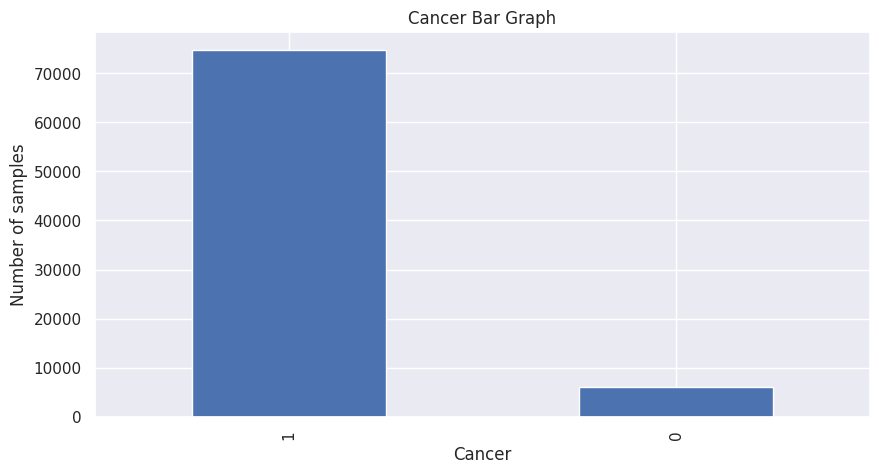

In [ ]:
finaldf.Cancer.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Cancer Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('Cancer');

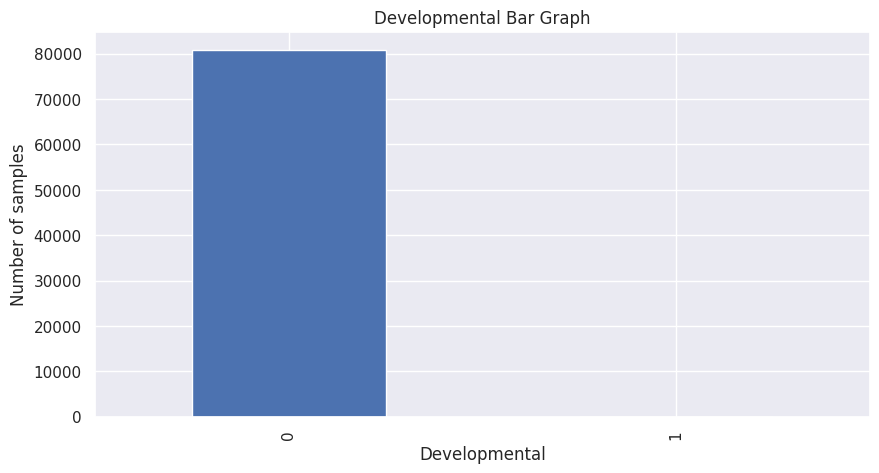

In [ ]:
finaldf['Developmental'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Developmental Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('Developmental');

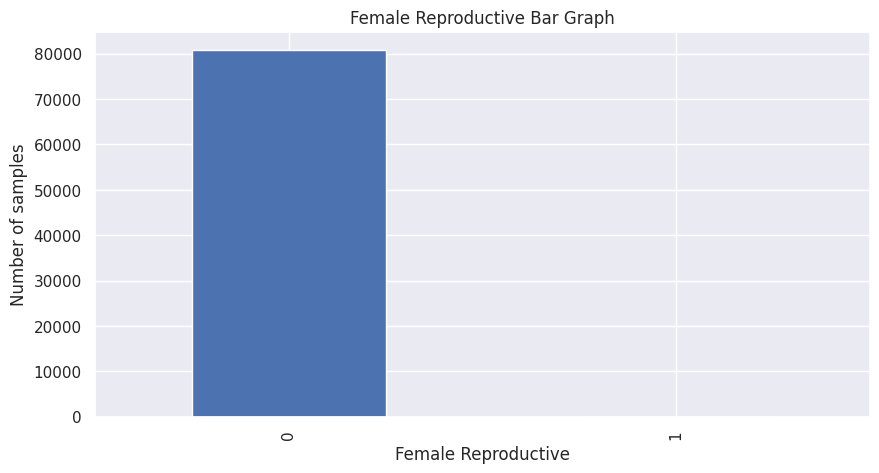

In [ ]:
finaldf['Female Reproductive'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Female Reproductive Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('Female Reproductive');

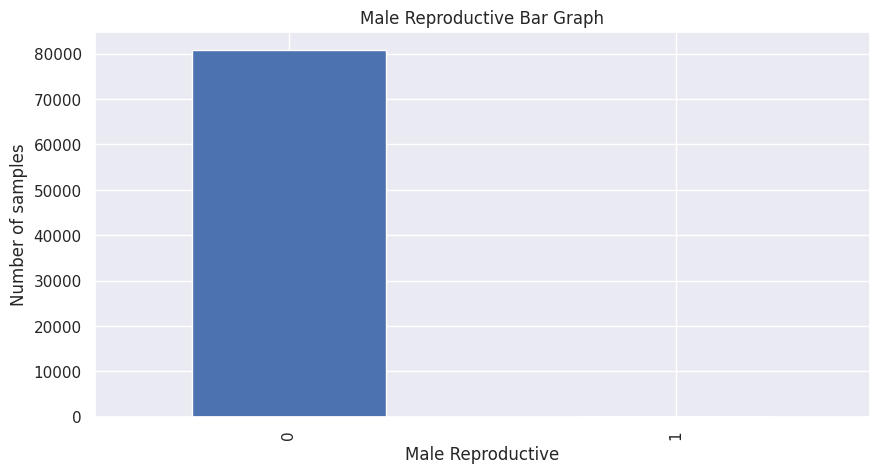

In [ ]:
finaldf['Males Reproductive'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Male Reproductive Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('Male Reproductive');

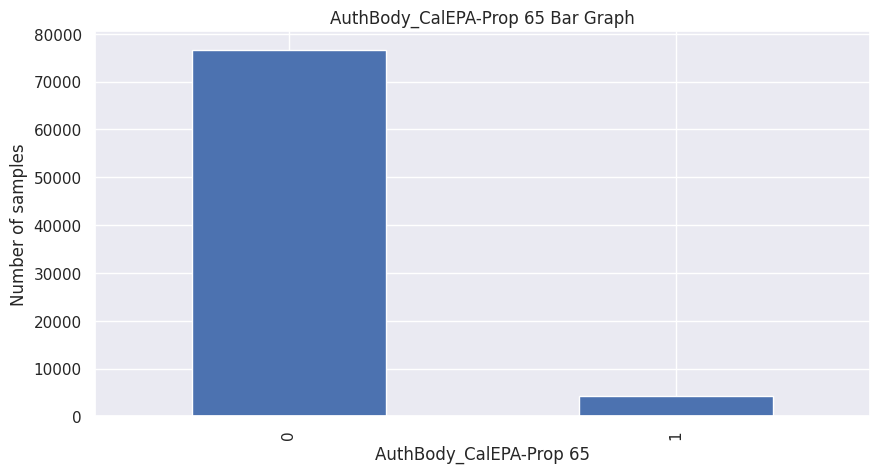

In [ ]:
finaldf['AuthBody_CalEPA-Prop 65'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("AuthBody_CalEPA-Prop 65 Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('AuthBody_CalEPA-Prop 65');

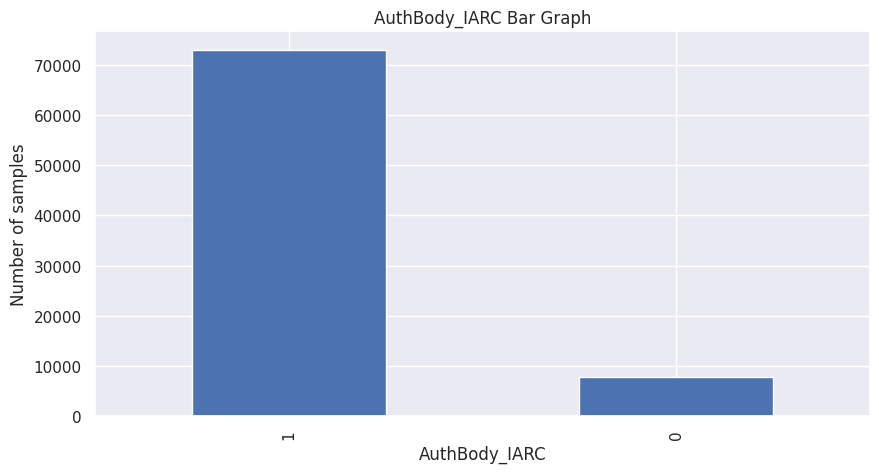

In [ ]:
finaldf['AuthBody_IARC'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("AuthBody_IARC Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('AuthBody_IARC');

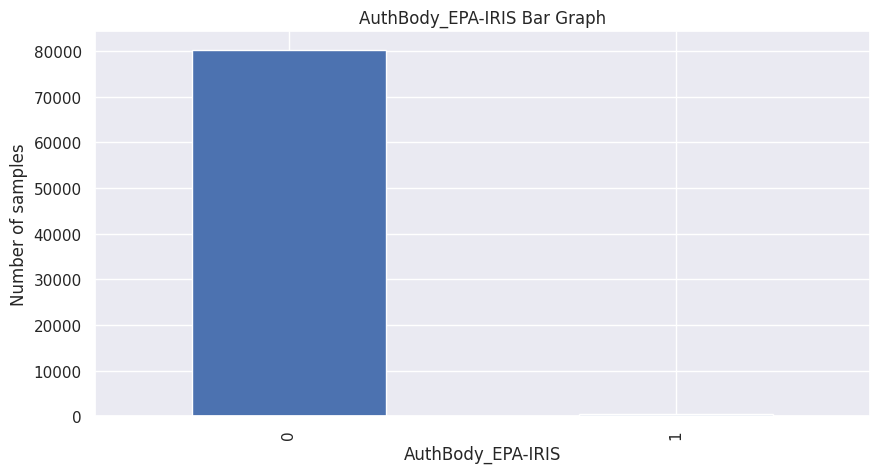

In [ ]:
finaldf['AuthBody_EPA-IRIS'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("AuthBody_EPA-IRIS Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('AuthBody_EPA-IRIS');

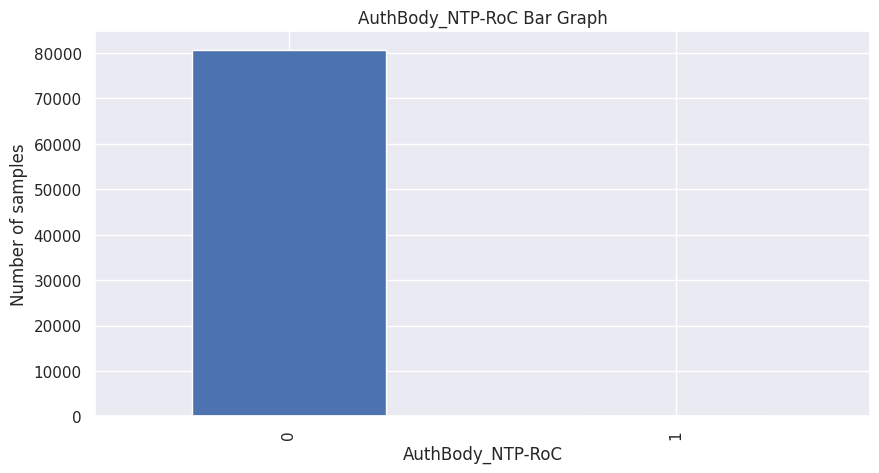

In [ ]:
finaldf['AuthBody_NTP-RoC'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("AuthBody_NTP-RoC Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('AuthBody_NTP-RoC');

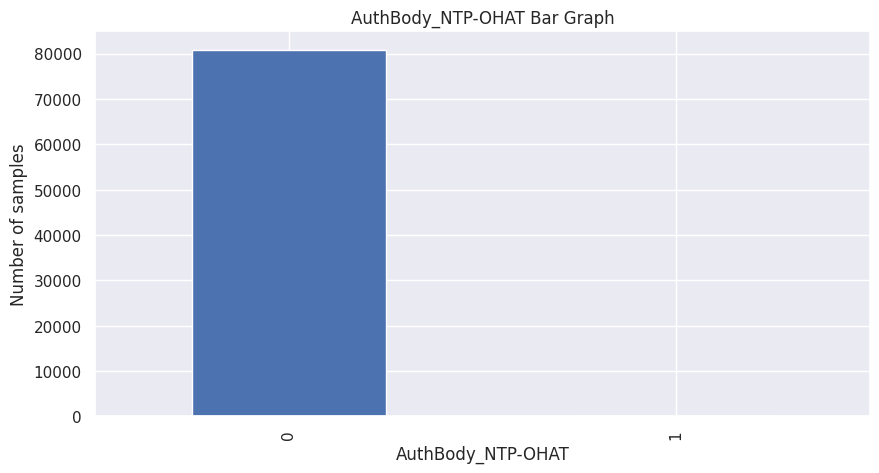

In [ ]:
finaldf['AuthBody_NTP-OHAT'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("AuthBody_NTP-OHAT Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('AuthBody_NTP-OHAT');

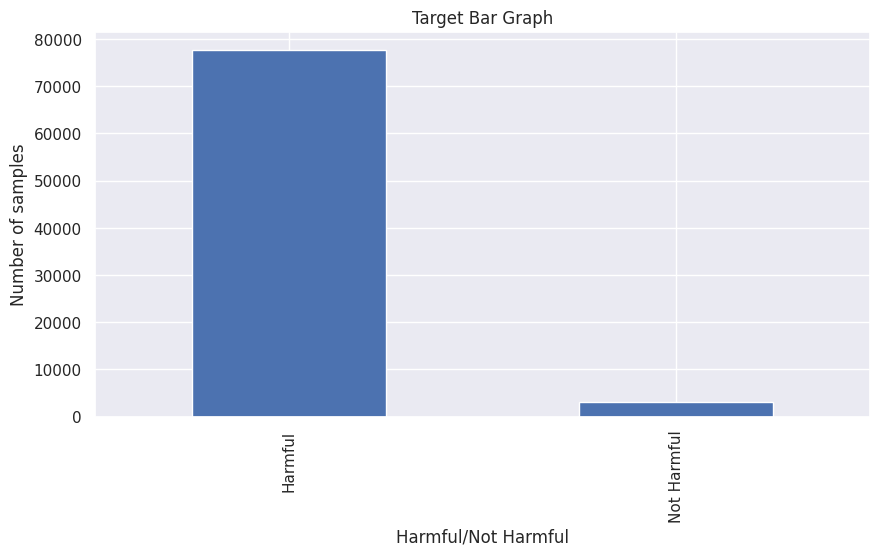

In [ ]:
finaldf['Target'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Target Bar Graph")
plt.ylabel('Number of samples')
plt.xlabel('Harmful/Not Harmful');

In [ ]:
finaldf['Female Reproductive'].value_counts()

0    80835
1       19
Name: Female Reproductive, dtype: int64

In [ ]:
finaldf['Males Reproductive'].value_counts()

0    80837
1       17
Name: Males Reproductive, dtype: int64

In [ ]:
finaldf['Developmental'].value_counts()

0    80830
1       24
Name: Developmental, dtype: int64

In [ ]:
finaldf['Cancer'].value_counts()

1    74778
0     6076
Name: Cancer, dtype: int64

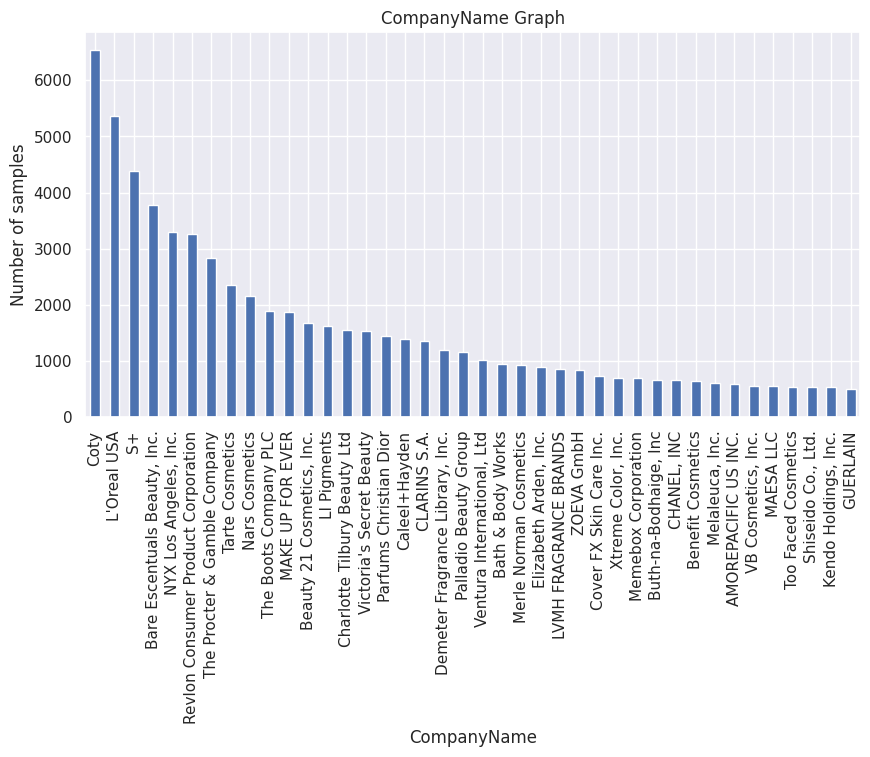

In [ ]:
finaldf.CompanyName.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("CompanyName Graph")
plt.ylabel('Number of samples')
plt.xlabel('CompanyName');

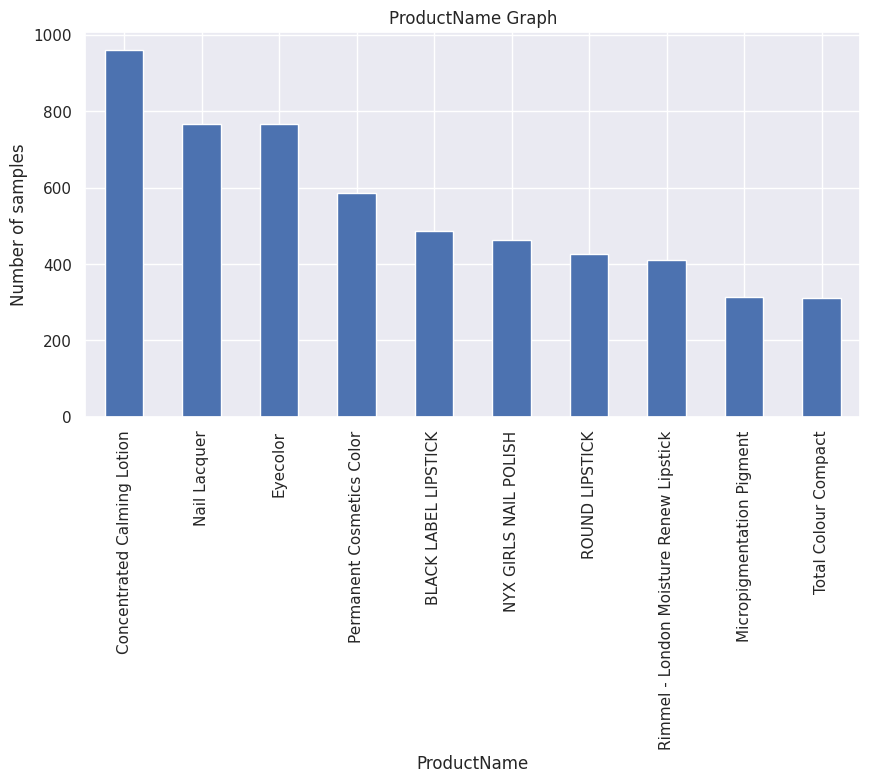

In [ ]:
finaldf.ProductName.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("ProductName Graph")
plt.ylabel('Number of samples')
plt.xlabel('ProductName');

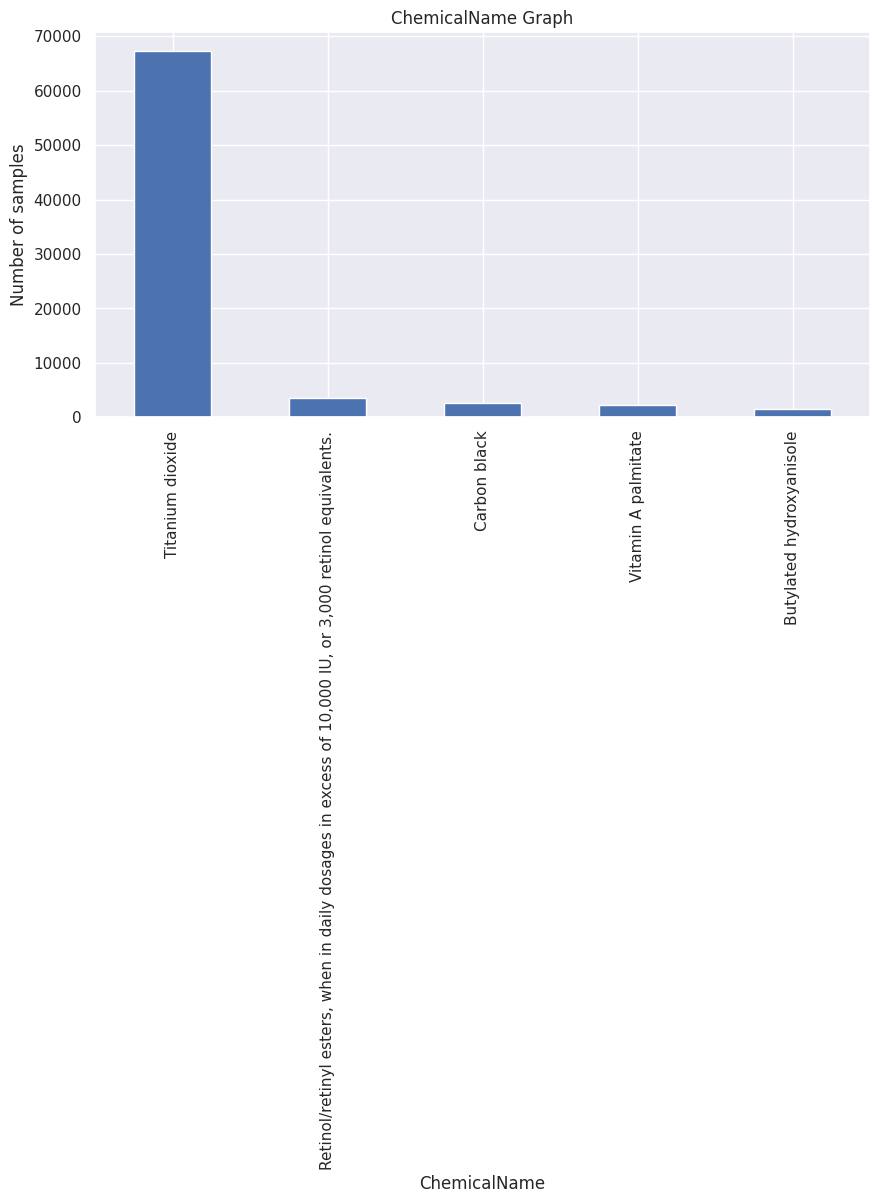

In [ ]:
finaldf.ChemicalName.value_counts().nlargest(5).plot(kind='bar', figsize=(10,5))
plt.title("ChemicalName Graph")
plt.ylabel('Number of samples')
plt.xlabel('ChemicalName');

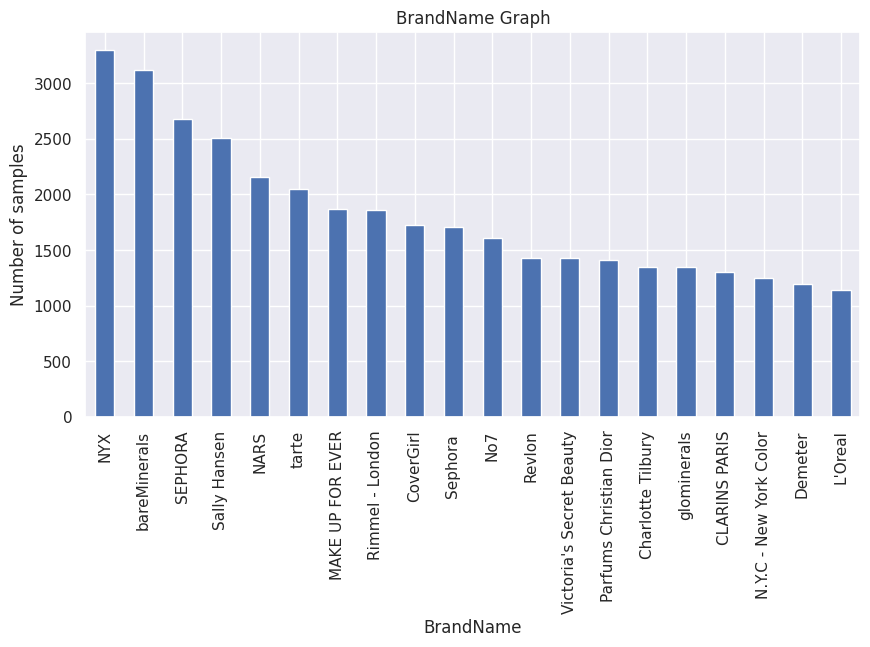

In [ ]:
finaldf.BrandName.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("BrandName Graph")
plt.ylabel('Number of samples')
plt.xlabel('BrandName');

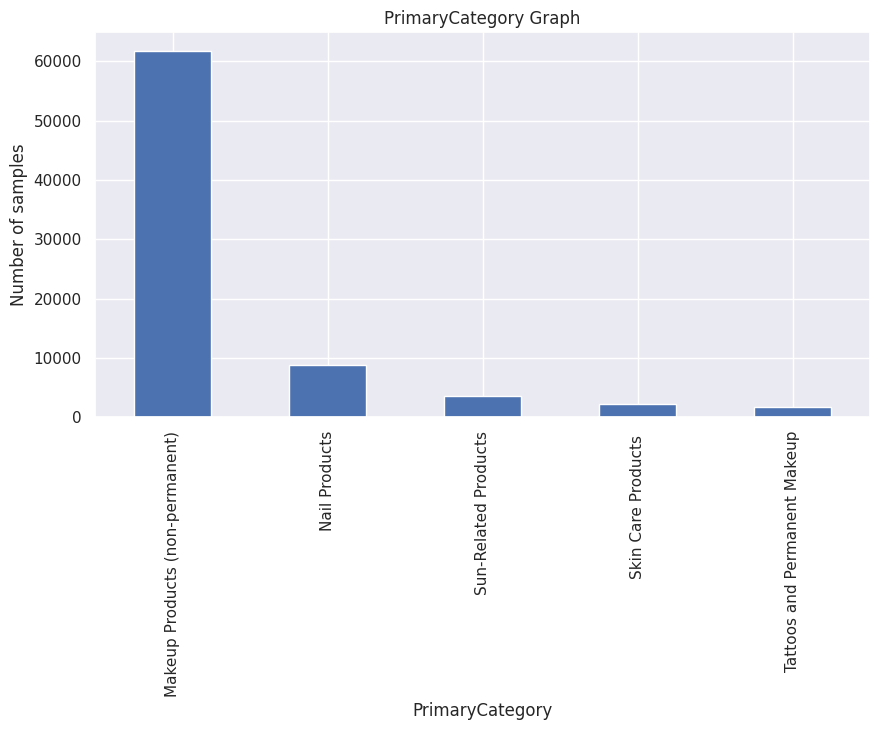

In [ ]:
finaldf.PrimaryCategory.value_counts().nlargest(5).plot(kind='bar', figsize=(10,5))
plt.title("PrimaryCategory Graph")
plt.ylabel('Number of samples')
plt.xlabel('PrimaryCategory');

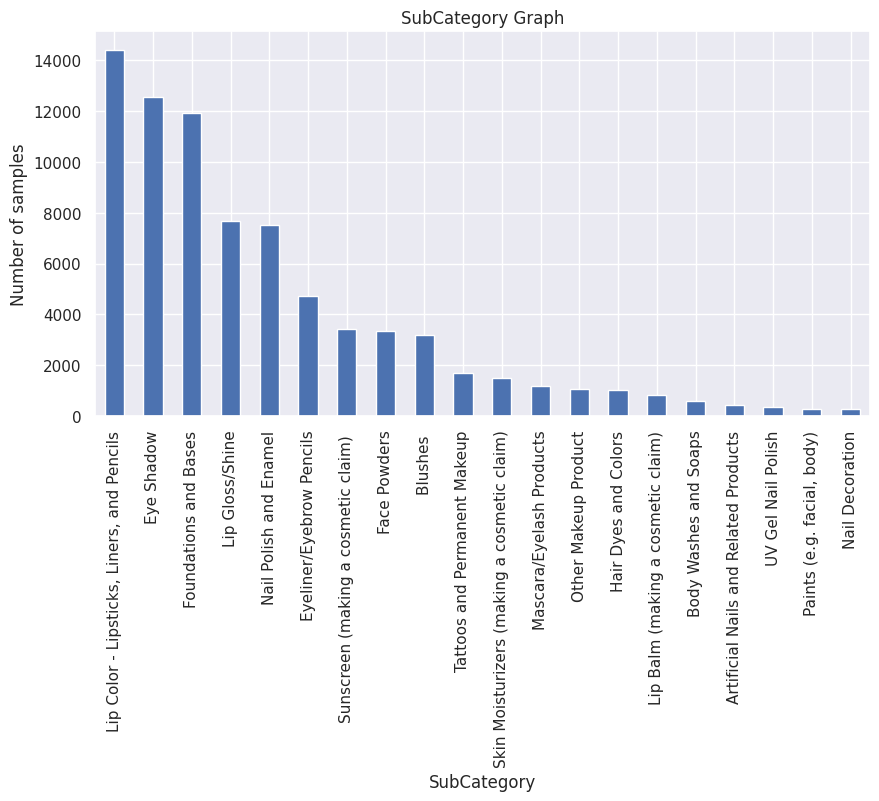

In [ ]:
finaldf.SubCategory.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("SubCategory Graph")
plt.ylabel('Number of samples')
plt.xlabel('SubCategory');

In [ ]:
finaldf.columns

Index(['ProductName', 'CSF', 'CompanyId', 'CompanyName', 'BrandName',
       'PrimaryCategoryId', 'PrimaryCategory', 'SubCategory', 'CasId',
       'CasNumber', 'ChemicalName', 'UniqueID', 'Chemical', 'Synonyms',
       'Cancer', 'Developmental', 'Female Reproductive', 'Males Reproductive',
       'AuthBody_CalEPA-Prop 65', 'AuthBody_IARC', 'AuthBody_EPA-IRIS',
       'AuthBody_NTP-RoC', 'AuthBody_NTP-OHAT', 'Target'],
      dtype='object')

<Axes: >

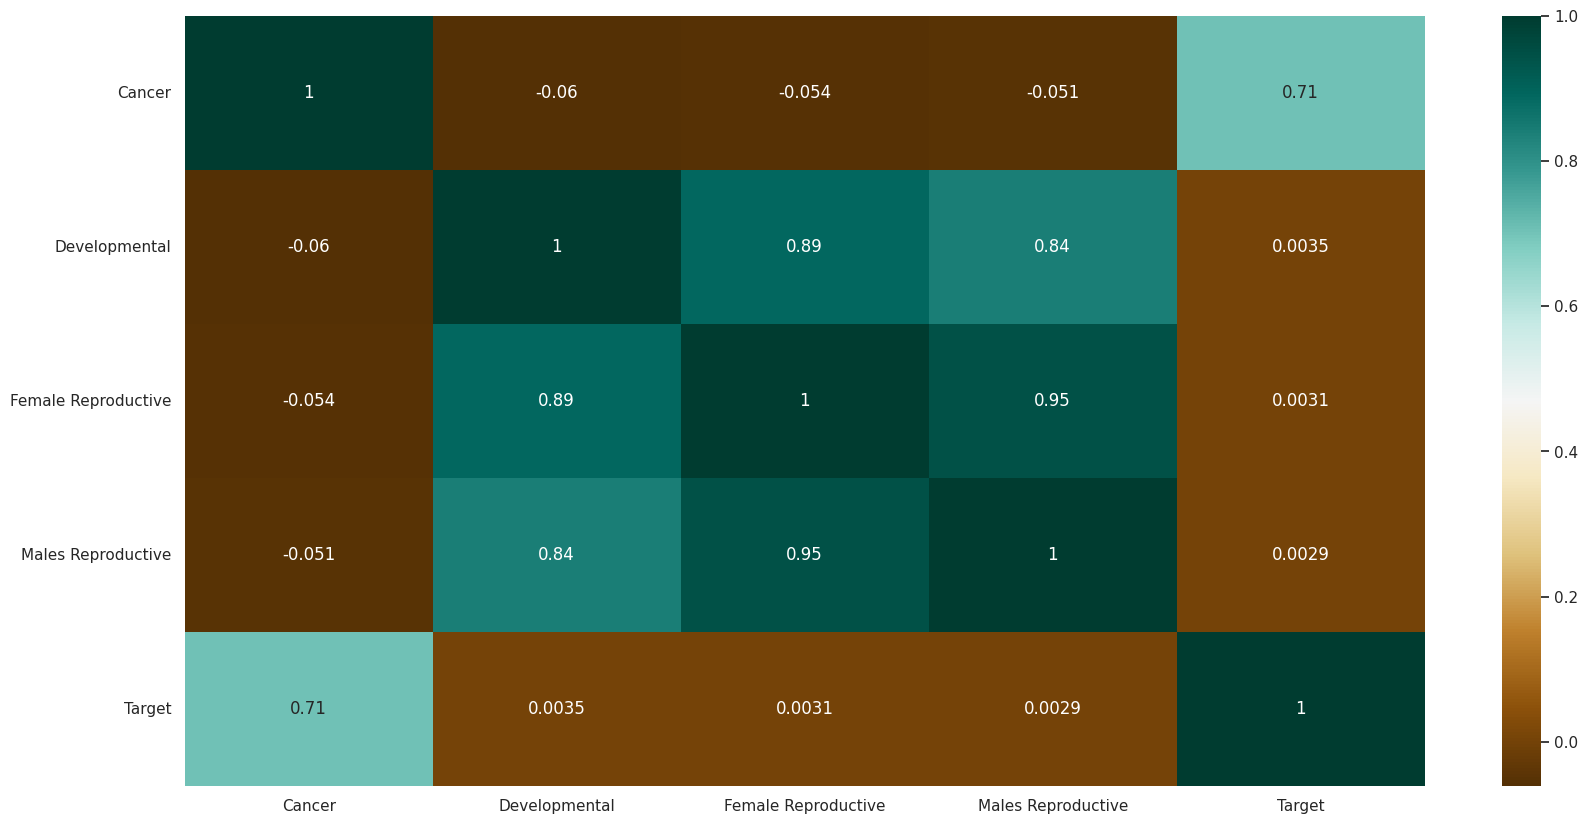

In [ ]:
#Converting objects to numeric form
finaldf.Target.replace('Harmful', 1, inplace=True)
finaldf.Target.replace('Not Harmful', 0, inplace=True)
#Correlations
plt.figure(figsize=(20,10))
c= finaldf[['Cancer','Developmental','Female Reproductive', 'Males Reproductive','Target']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
c

,Cancer,Developmental,Female Reproductive,Males Reproductive,Target
Cancer,1.000000,-0.060450,-0.053784,-0.050874,0.705286
Developmental,-0.060450,1.000000,0.889729,0.841589,0.003464
Female Reproductive,-0.053784,0.889729,1.000000,0.945894,0.003082
Males Reproductive,-0.050874,0.841589,0.945894,1.000000,0.002915
Target,0.705286,0.003464,0.003082,0.002915,1.000000


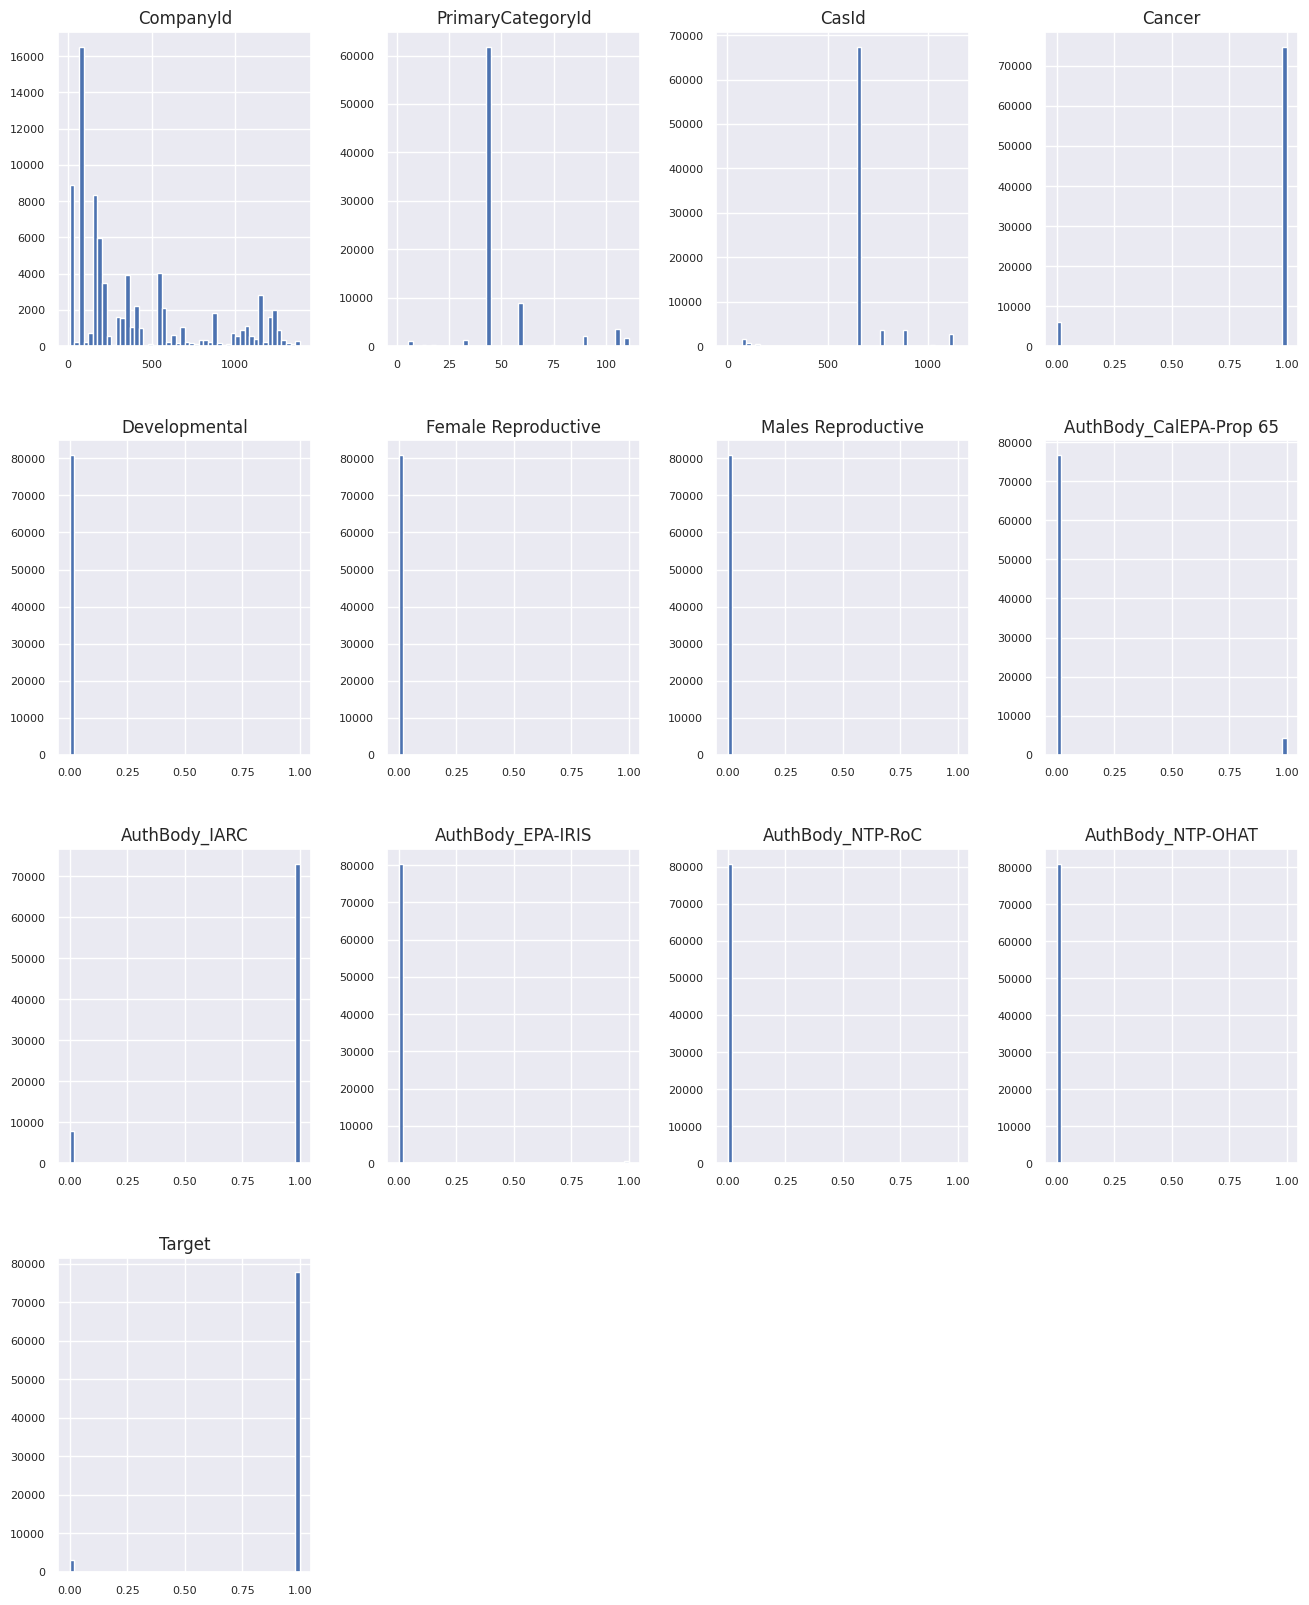

In [ ]:
finaldf.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


# Feature Engineering

We can Perform some of the techniques like Outlier detection, Normalization, Feature selection etc. But in this problem, there is no need of Outlier Detection and Normalization as the data is proper. Hence, We need to perform only feature selection in this step.

In [ ]:
#In my opinion, these features - 'Cancer', 'Developmental', 'Female Reproductive', 'Males Reproductive' acts as an Input features and Target column acts as an output.

In [ ]:
Input=finaldf[['Cancer', 'Developmental', 'Female Reproductive', 'Males Reproductive']]
Target=finaldf[['Target']]

# Modelling and Validation

In [ ]:
data=finaldf[['Cancer', 'Developmental', 'Female Reproductive', 'Males Reproductive', 'Target']]

Checking for class imbalance

In [ ]:
data['Target'].value_counts()

1    77713
0     3141
Name: Target, dtype: int64

There as 2 target classes Harmful and Not Harmful. But 'Not Harmful' records are very less when compared to 'Harmful' classes. Hence there is a class imbalance problem. We need to perform 'Smote Analysis' to overcome this problem and to make the classes balanced.

**Smote Analysis** - SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for addressing class imbalance in machine learning datasets. It works by generating synthetic samples for the minority class. To use SMOTE in Python, you can use the imbalanced-learn library, which provides an implementation of SMOTE and other resampling techniques.

**Test-Train Split**

In [ ]:
'''#Converting objects to numeric form
Target.Target.replace('Harmful', 1, inplace=True)
Target.Target.replace('Not Harmful', 0, inplace=True)'''

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Target, test_size=0.2, random_state=42)

In [ ]:
# Print class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train['Target']).value_counts())

Class distribution before SMOTE:
1    62176
0     2507
Name: Target, dtype: int64


In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


**Smote Analysis**

In [ ]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled['Target']).value_counts())


Class distribution after SMOTE:
1    62176
0    62176
Name: Target, dtype: int64


**Modelling**

In [ ]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Modelling using Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC= DTC.fit(X_train_resampled,y_train_resampled)
y_pred_test = DTC.predict(X_test)
#Modelling using Random Forest Classifier
clf = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 50,random_state=5, max_depth = 5)
clf.fit(X_train_resampled,y_train_resampled.values.ravel())
y_pred_test = clf.predict(X_test)
#Modelling using Support Vector Machine
svc = svm.SVC(kernel='linear',random_state=5)
svc.fit(X_train_resampled, y_train_resampled.values.ravel())
y_pred_test = svc.predict(X_test)
#Modelling using K-Nearesr Neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled,y_train_resampled.values.ravel())
y_pred_test = knn.predict(X_test)
#Modellinh using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_resampled,y_train_resampled.values.ravel())
y_pred_test = logreg.predict(X_test)

In [ ]:
#Evaluating all models using Accuracy, precision, Recall, F! Score and ROC AUC
models = ['logreg', 'svc','knn','clf','DTC']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(X_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 #metrics.roc_auc_score(y_test, y_pred),
                 metrics.f1_score(y_test,y_pred)))


Model                    Accuracy      Precision         Recall       F1 score

logreg                       0.96           1.00           0.96           0.98
svc                          0.96           1.00           0.96           0.98
knn                          0.96           0.96           1.00           0.98
clf                          0.96           1.00           0.96           0.98
DTC                          0.96           1.00           0.96           0.98


In [ ]:
'''from sklearn.metrics import classification_report
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))'''

'from sklearn.metrics import classification_report\n# Print classification report\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))'

In [ ]:
#Line Chart for visualizing results
Model = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Decision Tree']
Accuracy = [0.96,0.96,0.96,0.96,0.96]
Precision = [1.00,1.00,0.96,1.00,1.00]
Recall = [0.96,0.96,1.00,0.96,0.96]
F1_Score = [0.98,0.98,0.98,0.98,0.98]
# Create a dataframe
res = pd.DataFrame({
    'Model': Model,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1 Score': F1_Score
})

# Display the dataframe
print(res)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.96       1.00    0.96      0.98
1                  SVM      0.96       1.00    0.96      0.98
2                  KNN      0.96       0.96    1.00      0.98
3        Random Forest      0.96       1.00    0.96      0.98
4        Decision Tree      0.96       1.00    0.96      0.98


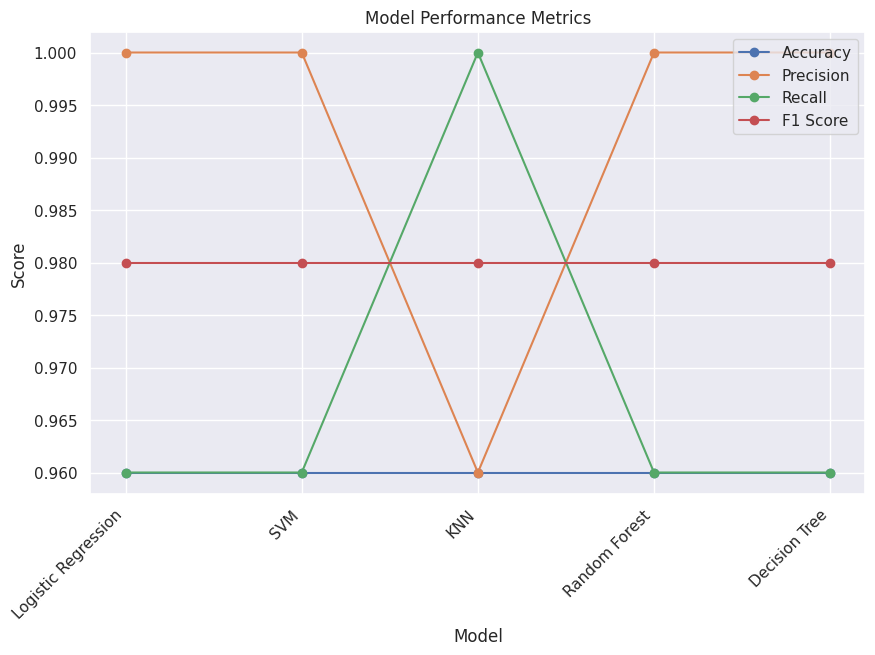

In [ ]:
# Line chart
plt.figure(figsize=(10, 6))

# Plotting lines for each metric
plt.plot(res['Model'], res['Accuracy'], marker='o', label='Accuracy')
plt.plot(res['Model'], res['Precision'], marker='o', label='Precision')
plt.plot(res['Model'], res['Recall'], marker='o', label='Recall')
plt.plot(res['Model'], res['F1 Score'], marker='o', label='F1 Score')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
#plt.tight_layout()
plt.show()

**Case Study 1 : Tuning Hyper parameters for tree-based models**

In [ ]:
#Decision-tree

In [ ]:
# Let's check the error at different depths
train=[]
for i in range(1,10):
    dec = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 5, max_depth=i)
    dec.fit(X_train_resampled, y_train_resampled)
    train.append(1-metrics.accuracy_score(dec.predict(X_train_resampled), y_train_resampled))

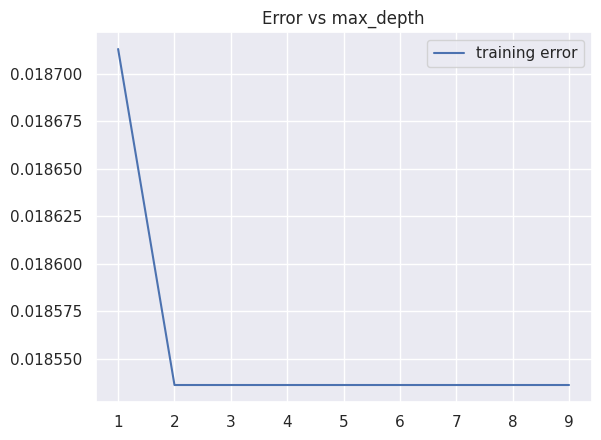

In [ ]:
plt.title('Error vs max_depth')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.legend()

In [ ]:
#Modelling using Decision Tree Classifier with hyper parameter tuning
#Assigning max_depth as 2, because the above plot shows less error at that point
DTC1 = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 5, max_depth=2)
DTC1= DTC1.fit(X_train_resampled,y_train_resampled)
y_pred_test1 = DTC1.predict(X_test)

In [ ]:
#Evaluating all models using Accuracy, precision, Recall, F! Score and ROC AUC
models = ['DTC', 'DTC1']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(X_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 #metrics.roc_auc_score(y_test, y_pred),
                 metrics.f1_score(y_test,y_pred)))


Model                    Accuracy      Precision         Recall       F1 score

DTC                          0.96           1.00           0.96           0.98
DTC1                         0.96           1.00           0.96           0.98


From the above results, it is clear that there is no significant difference in the results of decision tree classification even after performing hyper-parameter tuning

**Random - Forest Classifier**

Hyper parameter tuning can be done for 2 parameters - max_depth and n_estimators

In [ ]:
# Let's check the error at different depths
train=[]
for i in range(1,10):
    rfc = RandomForestClassifier(criterion = 'entropy',max_features = 'log2', random_state = 5, max_depth=i)
    rfc.fit(X_train_resampled, y_train_resampled)
    train.append(1-metrics.accuracy_score(rfc.predict(X_train_resampled), y_train_resampled))

<ipython-input-68-6c22cb21fe24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-68-6c22cb21fe24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-68-6c22cb21fe24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-68-6c22cb21fe24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-68-6c22cb21fe24>:5: DataConversio

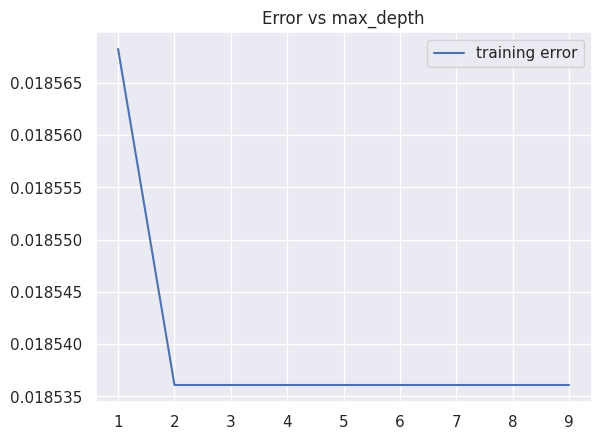

In [ ]:
plt.title('Error vs max_depth')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.legend()

In [ ]:
# Let's check the error at different estimators
train=[]
for i in range(1,10):
    rfc = RandomForestClassifier(criterion = 'entropy',max_features = 'log2', random_state = 5, max_depth=2, n_estimators = i)
    rfc.fit(X_train_resampled, y_train_resampled)
    train.append(1-metrics.accuracy_score(rfc.predict(X_train_resampled), y_train_resampled))

<ipython-input-78-541bcb5930a8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-78-541bcb5930a8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-78-541bcb5930a8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-78-541bcb5930a8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)
<ipython-input-78-541bcb5930a8>:5: DataConversio

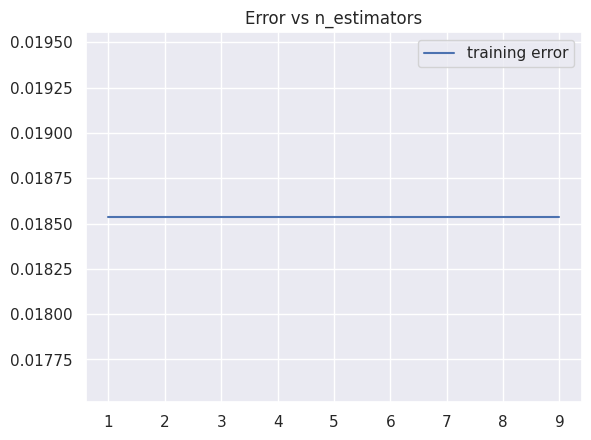

In [ ]:
plt.title('Error vs n_estimators')
estimators=[i for i in range(1,10)]
plt.plot( estimators ,train,label = 'training error')
plt.legend()

Tuning the parameters max_depth to 2 and n_estimators to 1

In [ ]:
clf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 1,random_state=5, max_depth = 2)
clf1.fit(X_train_resampled, y_train_resampled.values.ravel())
y_pred_train= clf1.predict(X_train_resampled)

In [ ]:
#Evaluating all models using Accuracy, precision, Recall, F! Score and ROC AUC
models = ['clf', 'clf1']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(X_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 #metrics.roc_auc_score(y_test, y_pred),
                 metrics.f1_score(y_test,y_pred)))


Model                    Accuracy      Precision         Recall       F1 score

clf                          0.96           1.00           0.96           0.98
clf1                         0.96           1.00           0.96           0.98


From the above results, it is clear that there is no significant difference in the results of random forest classification even after performing hyper-parameter tuning

**Case Study 2 - Performing hyper-parameter tuning for KNN**



---



In [ ]:
# Let's check the error at different number of neighbours
train=[]
for i in range(1,10):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train_resampled, y_train_resampled)
    train.append(1-metrics.accuracy_score(knn1.predict(X_train_resampled), y_train_resampled))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

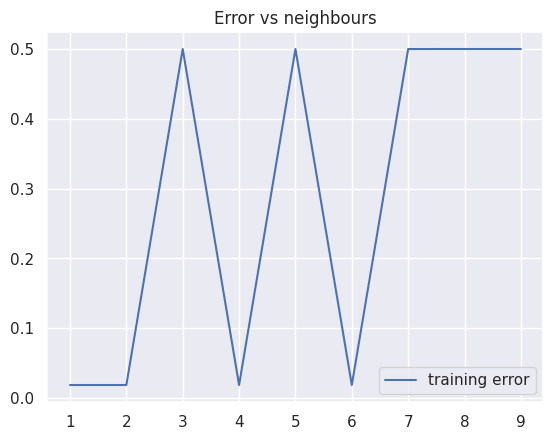

In [ ]:
plt.title('Error vs neighbours')
neighbours=[i for i in range(1,10)]
plt.plot( neighbours ,train,label = 'training error')
plt.legend()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X_train_resampled,y_train_resampled.values.ravel())
y_pred_test = knn1.predict(X_test)

In [ ]:
#Evaluating all models using Accuracy, precision, Recall, F! Score and ROC AUC
models = ['knn', 'knn1']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(X_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 #metrics.roc_auc_score(y_test, y_pred),
                 metrics.f1_score(y_test,y_pred)))

Model                    Accuracy      Precision         Recall       F1 score

knn                          0.96           0.96           1.00           0.98
knn1                         0.96           1.00           0.96           0.98


From the above experiment, it is clear that there is no change in the Accuracy and F1 Score but precision and recall performance has changed.
The precision has improved and recall has decreased a bit. Now, we have choose among Precision and recall.

I'm preferring recall over precision and will explain it with an example. For example, if the chemical is actually harmful and if the model predicts it as not harmful, that is considered as false negative. This false negative rate can be understood using Recall. where as the false positive rate is analysed in Precision that means if the chemical is actually harmless and is predicted as harmful. This is not a big deal in our scenario. Hence, this study focusses on Recall and from the above experiment, we can continue with the initial version of KNN where recall is better when compared to the model after performing hyper-parameter tuning.

**Confusion Matrix:** Confusion Matrix: This matrix is composed of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) which gives a detailed and pictorial representation of model prediction performance.
where,

  
True Positives (TP): The records that are correctly predicted as positive.

  
True Negatives (TN): The records that are correctly predicted as negative.

  
False Positives (FP): The records that are incorrectly predicted as positive.

  
False Negatives (FN): The records that are incorrectly predicted as negative.


In [ ]:
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-91-142cc6a586a0>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_r

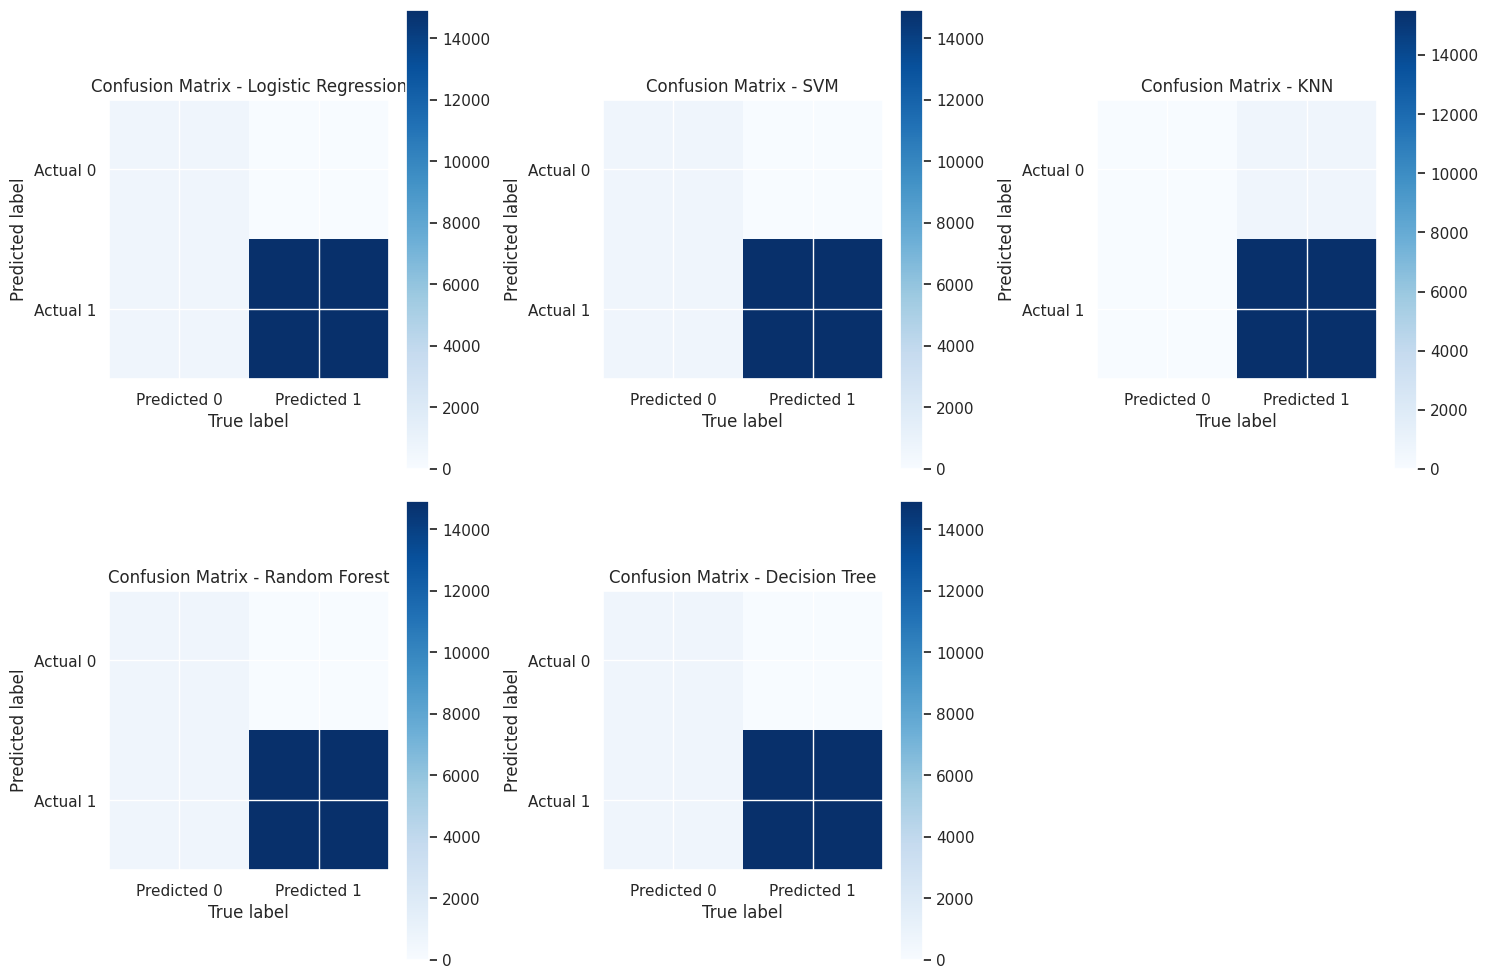

In [ ]:
# Instantiate models
models = {
    'Logistic Regression': logreg,
    'SVM': svc,
    'KNN': knn,
    'Random Forest': clf,
    'Decision Tree': DTC
}

# Plot confusion matrices for each model
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plt.tight_layout()
plt.show()